# Lead Scoring Assignment 


###### Problem Definition
1. How to increase the conversion rate to around 80% of the provided leads, without leaving too much true leads undetected.  Higher conversion with high revenue
2. Get a lead score each of the leads which can be used by the company to target potential leads

###### DS problem Definintion

1. Build logistic regression model to assign a lead score between 0 and 100 
2. Find the optimal features that give a highest optimal precision and recall score.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# creation of leads dataframe from the csv file

leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Quick glance at the columns, datatypes
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [5]:
leads.shape

(9240, 37)

### EDA

#####  Change Select to NaN

All the Select visible above are actually missing values.

So we will convert all 'Select' to NaN values

This will impact in calculating and analysing missing values

In [6]:
# COnverting all 'Select to Nan'

leads.replace('Select', np.nan, inplace=True)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


###  Missing Values Check


###### Percentage (%) of missing values in each column

In [7]:
# Missing values % check, Only columns with missing values

missingPercent = leads.isnull().mean().round(2).sort_values(ascending = False)
missingPercent[missingPercent > 0]

How did you hear about X Education               0.78
Lead Profile                                     0.74
Lead Quality                                     0.52
Asymmetrique Profile Score                       0.46
Asymmetrique Activity Score                      0.46
Asymmetrique Profile Index                       0.46
Asymmetrique Activity Index                      0.46
City                                             0.40
Specialization                                   0.37
Tags                                             0.36
What matters most to you in choosing a course    0.29
What is your current occupation                  0.29
Country                                          0.27
TotalVisits                                      0.01
Page Views Per Visit                             0.01
Last Activity                                    0.01
dtype: float64

### Drop  columns with high missing percentage above 40%

[How did you hear about X Education, Lead Profile, Lead Quality, Asymmetrique Profile Score, Asymmetrique Activity Score, Asymmetrique Profile Index, Asymmetrique Activity Index

Though they may be useful, we will exclude them from the analysis
    1. Imputing them will be impossible, as all of them cannot  be reliably calculated or assumed
    2. Removing row will mean high data loss
    3. Also these are qualitative estimation, which can be subjective to be used in statistical analysis.
    So given last priority

In [8]:
cols = list(missingPercent[missingPercent > 0.40].index)
leads.drop(columns = cols, inplace =True)

###### City & Specialisation, by business understanding can be major predictors:  So special cosideration
1. Online education demand is based on infrastructure and faculty availiability which vary across regions
2. Highly possible that demand is much more for certain types of courses

In [9]:
# Investigating City

leads.City.value_counts(normalize =True)

Mumbai                         0.578352
Thane & Outskirts              0.134985
Other Cities                   0.123138
Other Cities of Maharashtra    0.082032
Other Metro Cities             0.068210
Tier II Cities                 0.013283
Name: City, dtype: float64

#### Impute missing with "Anywhere"
Cities can be a imortant factors as development and facilities widely vary across the cities and town. Demand and need can be high in areas, Even though we have 40% missing data.
We will impute it with " Anywhere" for now and retain

In [10]:
# Imputing missing City with "Anywhere"
leads.City.fillna('Anywhere', inplace =True)

In [11]:
# Checking the final distribution of City
leads.City.value_counts(normalize =True)

Anywhere                       0.397078
Mumbai                         0.348701
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

###### Retain City for now and recheck distribution later
WIth very high missing value and thin distribution on the remaing,
this column will be biased towards the missing, which is not really useful.
But we can evaluate the missing percetange again once we finish removing missing values from other features

###### Investigate Specialisation

In [12]:
# Investigating Specialisation
leads.Specialization.value_counts(normalize = True)

Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Travel and Tourism                   0.034642
Media and Advertising                0.034642
International Business               0.030375
Healthcare Management                0.027133
Hospitality Management               0.019454
E-COMMERCE                           0.019113
Retail Management                    0.017065
Rural and Agribusiness               0.012457
E-Business                           0.009727
Services Excellence                  0.006826
Name: Specialization, dtype: float64

##### Retain Specialisation by removing the missing rows

1. Imputing for such a wide range of values is difficult
2. Also with much missing percentage as compared to the widely distributed value, the analysis may be biased towards missing value, which as by itself is of no business meaning, as only a definite set of courses are provided

So we will remove the whole of missing rows in specialisation.

This is a significant chunk of data being excluded but with no option to balance or add weight to the missing data, 
we will just remove. The remaining number of columns is still not very small and can possibly give us a reasonable model.

Specialisation may still not end up as a key predictor but it can still have an effect as it interacts with other features, leading up to the final set of features

In [13]:
# Removing all missing Specialisation

leads.dropna(subset = ['Specialization'], inplace =True)

##### Investigating other columns above 10%


In [14]:
missingPercent = leads.isnull().mean().round(2).sort_values(ascending = False)
missingPercent[missingPercent > 0.1]

Tags                                             0.24
What matters most to you in choosing a course    0.21
What is your current occupation                  0.21
dtype: float64

In [15]:
# Investigating Tags
leads.Tags.value_counts()

Will revert after reading the email                  1778
Ringing                                               873
Already a student                                     284
Interested in other courses                           267
Closed by Horizzon                                    262
switched off                                          180
Busy                                                  158
Lost to EINS                                          137
Not doing further education                           111
Interested  in full time MBA                           83
Graduation in progress                                 73
invalid number                                         67
Diploma holder (Not Eligible)                          43
wrong number given                                     37
opp hangup                                             27
number not provided                                    21
in touch with EINS                                      7
Lost to Others

#### Drop Tags
Tags dont seem to be standard responses, but more like quick subjective notes.
And with high missing values of 36%. We can exclude it for now

In [16]:
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      4599
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

#### Drop 'What matters most to you in choosing a course'

Highly imbalance and neglible variance. Cannot probably of effective use

In [17]:
# checking distribution of Occupation
leads['What is your current occupation'].value_counts(normalize =True)

Unemployed              0.819466
Working Professional    0.146643
Student                 0.027156
Other                   0.003259
Housewife               0.002172
Businessman             0.001303
Name: What is your current occupation, dtype: float64

######   Drop 'What is your current occupation',   : Highly Imbalance

towards 'Unemployed' and not much variablity. 

In [18]:
leads['Country'].value_counts(normalize = True)

India                   0.955961
United States           0.009491
United Arab Emirates    0.008542
Saudi Arabia            0.003797
Singapore               0.003417
United Kingdom          0.002468
Australia               0.002088
Qatar                   0.001519
Hong Kong               0.001329
Bahrain                 0.001329
France                  0.001139
Oman                    0.000949
Germany                 0.000759
Canada                  0.000759
Kuwait                  0.000759
Nigeria                 0.000759
South Africa            0.000569
Netherlands             0.000380
Philippines             0.000380
Sweden                  0.000380
Bangladesh              0.000380
Belgium                 0.000380
China                   0.000190
Uganda                  0.000190
Kenya                   0.000190
Vietnam                 0.000190
Malaysia                0.000190
Liberia                 0.000190
Ghana                   0.000190
Russia                  0.000190
Italy     

#### Drop 'Country" : High Imbalance

Almost all in India

In [19]:
# Dropping the above columns

leads.drop(columns =['Tags','What is your current occupation', 'What matters most to you in choosing a course','Country'], inplace=True)

###### Checking the remaining missing values


In [20]:
missingPercent = leads.isnull().mean().round(2).sort_values(ascending = False)
missingPercent[missingPercent > 0]

TotalVisits             0.01
Page Views Per Visit    0.01
Last Activity           0.01
dtype: float64

###### Dropping row them the few missing values

In [21]:
leads.dropna( inplace =True)

In [22]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5792 entries, 2 to 9239
Data columns (total 26 columns):
Prospect ID                                 5792 non-null object
Lead Number                                 5792 non-null int64
Lead Origin                                 5792 non-null object
Lead Source                                 5792 non-null object
Do Not Email                                5792 non-null object
Do Not Call                                 5792 non-null object
Converted                                   5792 non-null int64
TotalVisits                                 5792 non-null float64
Total Time Spent on Website                 5792 non-null int64
Page Views Per Visit                        5792 non-null float64
Last Activity                               5792 non-null object
Specialization                              5792 non-null object
Search                                      5792 non-null object
Magazine                                    5792 

###### Final check of missing vaues

In [23]:
# Checking the missing value percentage again
leads.isnull().mean().round(2).sort_values(ascending = False)


Last Notable Activity                       0.0
A free copy of Mastering The Interview      0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

#### No Missing values

In [24]:
# ReChecking the final distribution of City
leads.City.value_counts(normalize =True)

Mumbai                         0.533322
Thane & Outskirts              0.123273
Other Cities                   0.112742
Anywhere                       0.080283
Other Cities of Maharashtra    0.073377
Other Metro Cities             0.064227
Tier II Cities                 0.012776
Name: City, dtype: float64

##### City is acceptable now

Anywhere is now limited to 8%

### Imbalance Check for the remaining categorical 




In [25]:
# The remaining categorical columns

catCols = ['Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'Last Activity',
       'Specialization', 'Search', 'Magazine', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']

In [26]:
# Imbalance check for the remaining categorical variables
for catCol in catCols:
    print(leads[catCol].value_counts( normalize=True).round(4))
    print()





Landing Page Submission    0.8218
API                        0.1148
Lead Add Form              0.0609
Lead Import                0.0024
Name: Lead Origin, dtype: float64

Direct Traffic       0.4111
Google               0.3400
Organic Search       0.1359
Reference            0.0573
Olark Chat           0.0418
Referral Sites       0.0060
Welingak Website     0.0026
Facebook             0.0024
Click2call           0.0007
bing                 0.0003
Social Media         0.0003
Press_Release        0.0003
blog                 0.0002
youtubechannel       0.0002
Pay per Click Ads    0.0002
NC_EDM               0.0002
testone              0.0002
welearnblog_Home     0.0002
WeLearn              0.0002
Name: Lead Source, dtype: float64

No     0.9126
Yes    0.0874
Name: Do Not Email, dtype: float64

No     0.9997
Yes    0.0003
Name: Do Not Call, dtype: float64

0    0.5625
1    0.4375
Name: Converted, dtype: float64

Email Opened                    0.4047
SMS Sent                        0.3336


In [27]:
# Columns with high imbalance
highImbalance = ['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses','Update me on Supply Chain Content',
'Get updates on DM Content','I agree to pay the amount through cheque'
]

In [28]:
# Removing the high imbalance
leads.drop(columns =highImbalance, inplace=True)
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Categorical value reduction : High categorical value columns 

We will optimise the values in the following columns

###### 'Lead Source', 'Last Activity' , 'Specialization', 'Last Notable Activity'

We can club all the values less than 1 % as 'Others'

In [29]:
# clubbing categorical values of less than 1% to group 

highCatCols = [ 'Lead Source', 'Last Activity' , 'Specialization', 'Last Notable Activity']

for highCatCol in highCatCols:
    catCount = leads[highCatCol].value_counts(normalize =True)
    clubCols = list(catCount[catCount <0.01].index)
    leads[highCatCol].replace(clubCols,'Others', inplace =True)



In [30]:
for highCatCol in highCatCols:
    print(leads[highCatCol].value_counts(normalize =True))
    print()

Direct Traffic    0.411084
Google            0.339952
Organic Search    0.135877
Reference         0.057320
Olark Chat        0.041782
Others            0.013985
Name: Lead Source, dtype: float64

Email Opened                 0.404696
SMS Sent                     0.333564
Page Visited on Website      0.084254
Converted to Lead            0.046098
Email Bounced                0.035394
Email Link Clicked           0.025898
Olark Chat Conversation      0.025207
Form Submitted on Website    0.019682
Others                       0.012949
Unreachable                  0.012258
Name: Last Activity, dtype: float64

Finance Management                   0.165573
Human Resource Management            0.144510
Marketing Management                 0.142093
Operations Management                0.086153
Business Administration              0.068888
IT Projects Management               0.063191
Supply Chain Management              0.059738
Banking, Investment And Insurance    0.057838
Travel and Tourism

In [31]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

##### EDA: Duplication Check

Checking duplication in Id columns, so that we dont have any duplication of row

In [32]:
# Duplication check in Prospect ID and Lead Number
leads.duplicated( ['Prospect ID', 'Lead Number']).mean()

0.0

###### EDA : Removing irrelevant columns

We dont need ['Prospect ID', 'Lead Number'] as they are just marker and not a factor

In [33]:
# Dropping ['Prospect ID', 'Lead Number']

leads.drop(columns =['Prospect ID', 'Lead Number'] , inplace =True)
leads.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

### Outliers Check

In [34]:
# Quick Scan on distribution of numerical columns 

leads.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,5792.000000,5792.000000,5792.000000,5792.000000
mean,0.437500,4.383115,604.620684,3.027082
std,0.496121,5.362541,555.058578,2.104183
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,131.750000,2.000000
50%,0.000000,4.000000,367.000000,3.000000
75%,1.000000,5.000000,1086.250000,4.000000
max,1.000000,251.000000,2272.000000,55.000000


Suspected Outliers in Total Visits, Time spent and Page Views as well

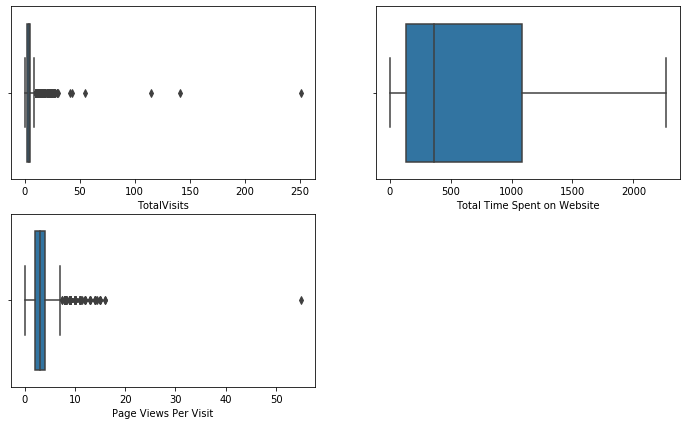

In [35]:
plt.figure( figsize=(12,7))

plt.subplot(2,2,1)
sns.boxplot(x='TotalVisits', data=leads)


plt.subplot(2,2,2)
sns.boxplot(x='Total Time Spent on Website', data=leads)


plt.subplot(2,2,3)
sns.boxplot(x='Page Views Per Visit', data=leads)


plt.show()

### Cap higher side outliers at 99%

In [36]:
# Capping higher end outliers values @ 99% in total visits and Page Views/visit
visitCap = leads.TotalVisits.quantile(.99)
pageViewCap = leads['Page Views Per Visit'].quantile(.99)
print (leads.TotalVisits[leads.TotalVisits > visitCap].count() , 'TotalVists Outliers')
print(leads['Page Views Per Visit'][leads['Page Views Per Visit'] >pageViewCap].count() ,  ' Pgae Views/Visit outlier')

58 TotalVists Outliers
42  Pgae Views/Visit outlier


In [37]:
# Capping outliers  at 99%
leads.TotalVisits[leads.TotalVisits > visitCap] = visitCap
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >pageViewCap] = pageViewCap

In [38]:
# Outliers Capped Check
leads.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,5792.000000,5792.000000,5792.000000,5792.000000
mean,0.437500,4.248829,604.620684,3.000839
std,0.496121,3.277475,555.058578,1.908994
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,131.750000,2.000000
50%,0.000000,4.000000,367.000000,3.000000
75%,1.000000,5.000000,1086.250000,4.000000
max,1.000000,18.090000,2272.000000,10.000000


 Outliers have been capped
 
 
 #### Bivariate Analysis

### Bivariate Analysis




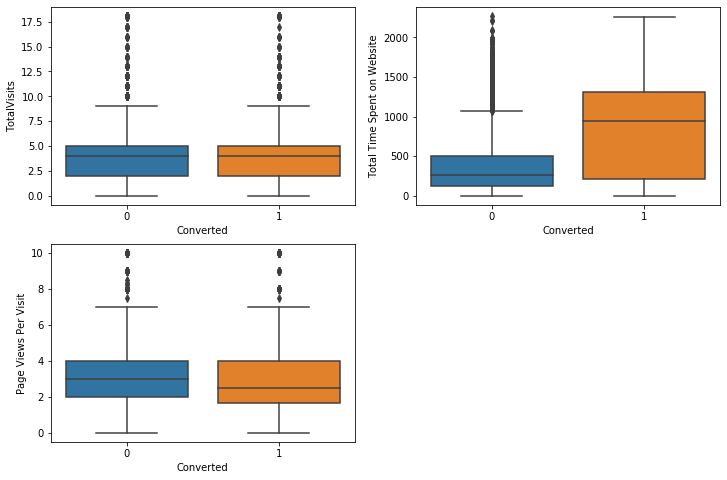

In [39]:
plt.figure(figsize = (12,8))

plt.subplot(2,2,1)
sns.boxplot(x='Converted', y='TotalVisits', data = leads)

plt.subplot(2,2,2)
sns.boxplot(x='Converted', y='Total Time Spent on Website', data=leads)


plt.subplot(2,2,3)
sns.boxplot(x='Converted', y='Page Views Per Visit', data=leads)
plt.show()




* Only Total time spent seem to indicant significant effect on conversion, without other considerations

* Features may still influence when other features are taken together

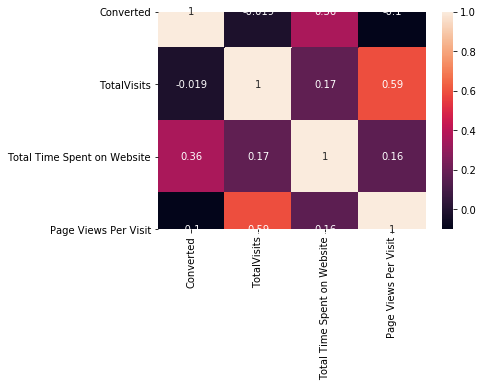

In [40]:
# Checking the correlation of the numeric values of the orginal data set
sns.heatmap(leads.corr(), annot =True)
plt.show()

No very high correlation observed

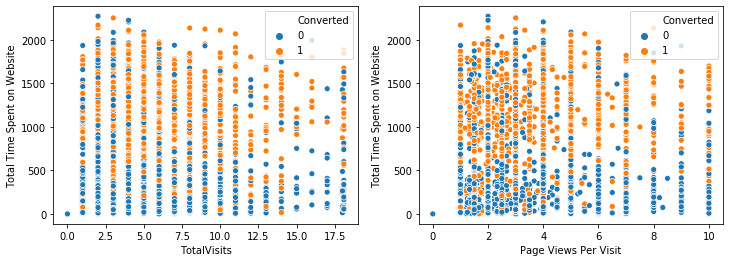

In [41]:
# Looking for any obvious conversion pattern in 
# Total Vist Vs Time spent on website
# Total Time spent Vs Page Views Per visit


plt.figure(figsize = (12,4))


plt.subplot(1,2,1)
sns.scatterplot(x='TotalVisits', y='Total Time Spent on Website',hue='Converted', data=leads)


plt.subplot(1,2,2)
sns.scatterplot(x='Page Views Per Visit', y='Total Time Spent on Website', hue='Converted', data=leads)
plt.show()


No apparent trend, except higher incidence of conversion more on higher time spent on website

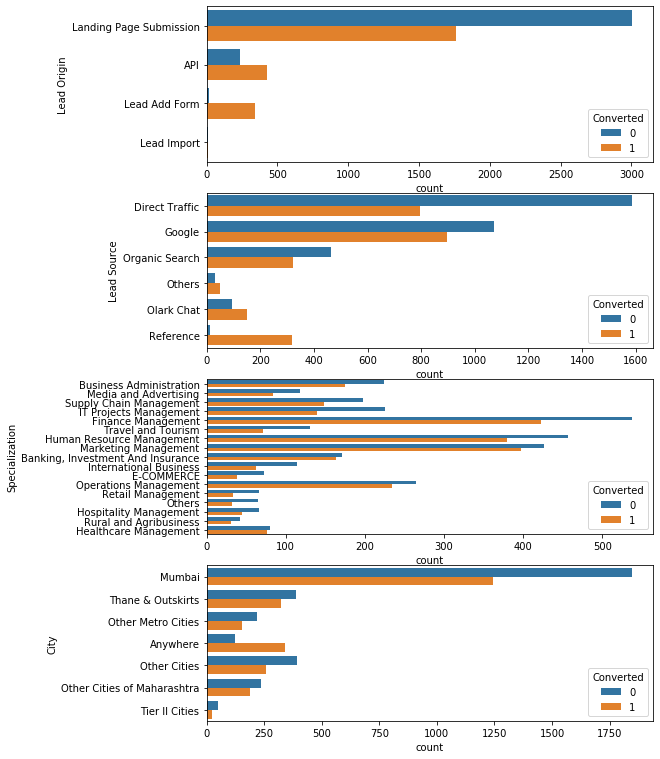

In [42]:
# Checking for trend on categorical feature Vs conversion
cols = ['Lead Origin', 'Lead Source','Specialization', 'City']

plt.figure(figsize = (8,20))

for x in enumerate(cols):
    plt.subplot(6,1,x[0]+1)
    sns.countplot(y=(x[1]),hue='Converted', data=leads)
    
plt.show()


* Possible significant variability of conversion in Lead Origin and Lead Source. For actual significance we can check on the model evaluation

* Though conversion is concentrated along certain values of the feature, no significant variablity(% conversion) observed  in Specialisation and city

In [43]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

#### EDA : Data consistency & Data formatting

* All categorical values need to be numeric.
* All value needs to logically and realistically valid

In [44]:
# Data Consistency Value consistency

leads.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,City,A free copy of Mastering The Interview,Last Notable Activity
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Mumbai,No,Modified
6,Landing Page Submission,Google,1,2.0,1640,2.0,Email Opened,Supply Chain Management,Mumbai,No,Modified
8,Landing Page Submission,Direct Traffic,0,2.0,71,2.0,Email Opened,IT Projects Management,Thane & Outskirts,Yes,Email Opened
9,API,Google,0,4.0,58,4.0,Email Opened,Finance Management,Mumbai,No,Email Opened


The following columns need to be one hot encoded or make use of dummies

'Lead Origin' , 'Lead Source' , 'Last Activity' , 'Specialization' , 'City', 'Last Notable Activity']m

In [45]:
# Dummies creation

cols = ['Lead Origin' , 'Lead Source' , 'Last Activity' , 'Specialization' , 'City', 'Last Notable Activity']


leads = pd.get_dummies(leads, columns = cols , drop_first =True, )
leads.head()


,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,...,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
2,1,2.0,1532,2.0,Yes,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1.0,305,1.0,No,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,1,2.0,1640,2.0,No,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
8,0,2.0,71,2.0,Yes,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
9,0,4.0,58,4.0,No,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


###### Convert Yes-1 & No - 0 for 'A free copy of Mastering The Interview'

In [46]:
# Convert Yes-1 & No - 0 for 'A free copy of Mastering The Interview'

leads['A free copy of Mastering The Interview'] = leads['A free copy of Mastering The Interview'].str.lower().map({'yes':1,'no':0}, na_action='ignore')

In [47]:
leads['A free copy of Mastering The Interview'].value_counts()

0    2910
1    2882
Name: A free copy of Mastering The Interview, dtype: int64

Fairly balanced and now numerical

In [48]:
# Checking if all the columns are now numerical
leads.info()

# ALL numeric values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5792 entries, 2 to 9239
Data columns (total 49 columns):
Converted                                        5792 non-null int64
TotalVisits                                      5792 non-null float64
Total Time Spent on Website                      5792 non-null int64
Page Views Per Visit                             5792 non-null float64
A free copy of Mastering The Interview           5792 non-null int64
Lead Origin_Landing Page Submission              5792 non-null uint8
Lead Origin_Lead Add Form                        5792 non-null uint8
Lead Origin_Lead Import                          5792 non-null uint8
Lead Source_Google                               5792 non-null uint8
Lead Source_Olark Chat                           5792 non-null uint8
Lead Source_Organic Search                       5792 non-null uint8
Lead Source_Others                               5792 non-null uint8
Lead Source_Reference                            5792 non-nul

In [49]:
leads.shape

(5792, 49)

### Modelling

##### Setting the independent X and dependent Y

X , indpendent features are the all columns except the dependent ' Converted'

In [50]:
# Independent X

# Putting feature variable to X
X = leads.drop(['Converted'], axis=1)

X.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Specialization_Business Administration',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Pro

In [51]:
# Dependent Y

Y = leads.Converted


##### Test_Train Split

Splitting 70:30

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

In [53]:
# Shape of training shape X
X_train.shape

(4054, 48)

In [54]:
# Shape of test set X
X_test.shape

(1738, 48)

### Feature Re Scaling

By MinMax Scaler



In [55]:
### Columns needed to be scaled
cols = [ 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [56]:
    # Scaler object
    scaler = MinMaxScaler()

In [57]:
# Actual Scaling of specific columns

X_train[cols]= scaler.fit_transform(X_train[cols])

In [58]:
# Scaling for test set as well
X_test[cols]= scaler.fit_transform(X_test[cols])

#### Feature Scaling : RFE

In [59]:
# Creating a logistic regression model

logreg = LogisticRegression()

In [60]:
from sklearn.feature_selection import RFE

# running RFE with 15 variables as output

rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, Y_train)

In [61]:
# Result of RFE with selection and ranking

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 6),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 19),
 ('Lead Source_Google', False, 25),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 21),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 2),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 7),
 ('Last Activity_Olark Chat Conversation', False, 9),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 10),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 3),
 ('Specialization_Business Administration', False, 29),
 ('Specialization_E-COMMERCE', False, 23),
 ('

In [62]:
# Selected Features
cols = list(X_train.columns[rfe.support_])
cols

['TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Source_Olark Chat',
 'Lead Source_Others',
 'Lead Source_Reference',
 'Last Activity_Email Bounced',
 'Last Activity_Email Opened',
 'Last Activity_Others',
 'Last Activity_SMS Sent',
 'Last Notable Activity_Email Opened',
 'Last Notable Activity_Modified',
 'Last Notable Activity_SMS Sent']

### Model_0

Starting model for to be iterated upon

Using the features generated from RFE 

In [63]:
# Running logistic regression Using Stats model 

# Adding intercept
X_train_sm = sm.add_constant(X_train[cols])

# running logistic regression 
logModel_0 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
result = logModel_0.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4054
Model:                            GLM   Df Residuals:                     4038
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1911.8
Date:                Tue, 25 Aug 2020   Deviance:                       3823.6
Time:                        02:05:58   Pearson chi2:                 4.21e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.1585      0.223     -5.188      0.000      -1.596      -0.721
TotalVisits                             1.0443      0.271      3.859      0.000       0.514       1.575
Total Time Spent on Website             4.5040      0.183     24.618      0.000       4.145       4.863
Page Views Per Visit                   -0.9295      0.276     -3.369      0.001      -1.470      -0.389
Lead Origin_Landing Page Submission    -1.1486      0.152     -7.564      0.000      -1.446      -0.851
Lead Origin_Lead Add Form               1.0352      0.841      1.231      0.218      -0.614       2.684
Lead Source_Olark Chat                  0.7284      0.240      3.040      0.002       0.259       1.198
Lead Source_Others                      1.3418      0.341      3.932      0.000       0.673       2.011
Lead Source_Reference                   2.6542      0.901      2.947      0.003       0.889       4.420
Last Activity_Email Bounced            -1.5181      0.423     -3.585      0.000      -2.348      -0.688
Last Activity_Email Opened              0.9526      0.195      4.891      0.000       0.571       1.334
Last Activity_Others                    1.2006      0.353      3.400      0.001       0.508       1.893
Last Activity_SMS Sent                  0.8447      0.196      4.303      0.000       0.460       1.230
Last Notable Activity_Email Opened     -0.6336      0.248     -2.557      0.011      -1.119      -0.148
Last Notable Activity_Modified         -0.7057      0.184     -3.826      0.000      -1.067      -0.344
Last Notable Activity_SMS Sent          0.6818      0.252      2.700      0.007       0.187       1.177
=======================================================================================================
"""

Lead Orgin_ lead Add form & Last Activity_ Unreachable not significant at 5% significance

In [64]:
# Check for the VIF values of the feature variables.

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Lead Add Form,21.30
7,Lead Source_Reference,20.79
12,Last Notable Activity_Email Opened,10.84
9,Last Activity_Email Opened,9.17
14,Last Notable Activity_SMS Sent,8.67
3,Lead Origin_Landing Page Submission,7.59
11,Last Activity_SMS Sent,7.42
2,Page Views Per Visit,6.22
0,TotalVisits,4.08
13,Last Notable Activity_Modified,4.02


Many features above accepted VIF at cut off of 3

##### Remove "Lead Origin_Lead Add Form"  : High VIF

To remove features one at a time

##### Model-0 evaluation

Before we optmise the model, lets calculate the base evaluation to get some indication if we are likely to achive desired precision and recall.

We need ensure detection of maximun True case, Hence Sensitivity/Recall

Also We need to ensure high 'Positive Predictive Value' , hence Precision, as business objectives want to convert 80% of effort

Accuracy is check to get an overall feel of the model performance

In [65]:
# Getting the predicted values on the train set
Y_train_pred = result.predict(X_train_sm)
Y_train_pred[:10]

3188    0.983001
8278    0.190646
8129    0.796727
2393    0.662948
1016    0.164717
1724    0.166792
48      0.587312
8842    0.013941
7812    0.349487
3008    0.572367
dtype: float64

##### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [66]:
Y_train_pred_final = pd.DataFrame({'Converted':Y_train.values, 'Convert_Prob':Y_train_pred})
Y_train_pred_final.head()

,Converted,Convert_Prob
3188,0,0.983001
8278,0,0.190646
8129,0,0.796727
2393,1,0.662948
1016,0,0.164717


##### Creating new column 'predicted' with 1 if Convert_Prob > 0.45 else 0

In [67]:
Y_train_pred_final['predicted'] = Y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.45 else 0)
Y_train_pred_final.head()

,Converted,Convert_Prob,predicted
3188,0,0.983001,1
8278,0,0.190646,0
8129,0,0.796727,1
2393,1,0.662948,1
1016,0,0.164717,0


In [68]:
# Confusion matrix

confusion = metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final.predicted )
confusion

array([[1815,  451],
       [ 422, 1366]], dtype=int64)

In [69]:
# Accuracy
metrics.accuracy_score(Y_train_pred_final.Converted, Y_train_pred_final.predicted ).round(4)

0.7847

In [70]:
# Recall
metrics.recall_score(Y_train_pred_final.Converted, Y_train_pred_final.predicted ).round(4)

0.764

In [71]:
# Precision
metrics.precision_score(Y_train_pred_final.Converted, Y_train_pred_final.predicted ).round(4)

0.7518

Initial evaluation seem to suggest we can possibly get an acceptable model as we refine this current model

### Model-1 : Dropped 'Lead Origin_Lead Add Form'

Not significant as well as highest VIF

In [72]:
# removing Lead Orgin_Lead Add Form
cols.remove('Lead Origin_Lead Add Form')

In [73]:
# Getting model-1 using stats model

X_train_sm = sm.add_constant(X_train[cols])
logMod_1 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
result = logMod_1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4054
Model:                            GLM   Df Residuals:                     4039
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1912.7
Date:                Tue, 25 Aug 2020   Deviance:                       3825.3
Time:                        02:06:00   Pearson chi2:                 4.21e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.1358      0.223     -5.100      0.000      -1.572      -0.699
TotalVisits                             1.0371      0.271      3.833      0.000       0.507       1.567
Total Time Spent on Website             4.4990      0.183     24.597      0.000       4.141       4.857
Page Views Per Visit                   -0.9541      0.276     -3.462      0.001      -1.494      -0.414
Lead Origin_Landing Page Submission    -1.1669      0.151     -7.704      0.000      -1.464      -0.870
Lead Source_Olark Chat                  0.7103      0.239      2.969      0.003       0.241       1.179
Lead Source_Others                      1.5115      0.318      4.751      0.000       0.888       2.135
Lead Source_Reference                   3.6600      0.369      9.931      0.000       2.938       4.382
Last Activity_Email Bounced            -1.5163      0.423     -3.581      0.000      -2.346      -0.686
Last Activity_Email Opened              0.9683      0.194      4.986      0.000       0.588       1.349
Last Activity_Others                    1.2036      0.353      3.405      0.001       0.511       1.896
Last Activity_SMS Sent                  0.8535      0.196      4.350      0.000       0.469       1.238
Last Notable Activity_Email Opened     -0.6428      0.248     -2.597      0.009      -1.128      -0.158
Last Notable Activity_Modified         -0.7064      0.185     -3.827      0.000      -1.068      -0.345
Last Notable Activity_SMS Sent          0.6799      0.252      2.693      0.007       0.185       1.175
=======================================================================================================
"""

1. Sign of all coefficient remain same
2. Last Activity_Unreachable not significant @ significance level of 5%

In [74]:
# Checking VIF in model-1 
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Notable Activity_Email Opened,10.84
8,Last Activity_Email Opened,9.13
13,Last Notable Activity_SMS Sent,8.66
3,Lead Origin_Landing Page Submission,7.56
10,Last Activity_SMS Sent,7.41
2,Page Views Per Visit,6.19
0,TotalVisits,4.08
12,Last Notable Activity_Modified,4.01
1,Total Time Spent on Website,2.30
6,Lead Source_Reference,1.46


Still high VIF obsevred, we can further refine the model

### Model-2 : Dropped  'Last Activity Unreachable'

Removing one predictor a time and evaluating.

Giving higher priority to significance.

So removed, Last Activity Unreachable

In [75]:
# Updating selected features by removing last Activity_unreachable
cols.remove('Last Activity_Unreachable')


ValueError: list.remove(x): x not in list

In [ ]:
# Model 2

# Adding intercept
X_train_sm = sm.add_constant(X_train[cols])

# Actual logistic regression model
logMod_2 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
result = logMod_2.fit()
result.summary()

* All predictors are significant
* All signs of the coefficient have remains unchanged

In [ ]:
# Checking VIF in model-2
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif



###### Remove 'Last Activity_SMS Sent'   : VIF Cut off @ 3

Using a cut off of 3 for VIF





### Model-3 : Dropped  - 'Last Activity_SMS Sent'




In [ ]:
# Selected features updated
cols.remove('Last Activity_SMS Sent')

In [ ]:
# MOdel-3

X_train_sm = sm.add_constant(X_train[cols])
logMod_3 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
result = logMod_3.fit()
result.summary()

* All predictors significant
* All the sign of the coefficient has remain same

In [ ]:
# Checking VIF in model-3
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

###### High VIF to be dropped from selected features 

* Page Views Per Visit highest VIF. 
* VIF Accepted less 3

### Model -4  : ' Page Views Per Visit' dropped

In [ ]:
# update selected features
cols.remove('Page Views Per Visit')

In [ ]:
# Model-4

X_train_sm = sm.add_constant(X_train[cols])
logMod_4 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
result = logMod_4.fit()
result.summary()

Model-4 Summary Note

* All predictors significant
* All the sign of the coefficient has remain same

In [ ]:
# Checking VIF in model-4
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif



Lead Origin_Landing Page Submission VIF > Accepted less 3

#### Model -5  :  	'Lead Origin_Landing Page Submission' dropped

In [ ]:
# selected features updated

cols.remove('Lead Origin_Landing Page Submission')

In [ ]:
# Model 5

X_train_sm = sm.add_constant(X_train[cols])
logMod_5 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
result = logMod_5.fit()
result.summary()

Model-5 Summary Note

* All predictors significant
* All the sign of the coefficient has remain same

In [ ]:
# Checking VIF in model-5
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

###  End of model iteration
* All predictors significant at 5% signficane
* No coefficient with very small value
* VIF of all predictors less than accpeted threshold of 3

### Model Evaluation

We will evaluate on :
1. Higher Precision - Target of 80% ( So 80% of the effort of lead is converted)
2. Higher Recall / Sensitivity : So that all the true potential leads are picked up
3. Accuracy: for an overall sense

But since Precision and Recall are inverse in nature, we will look for an optimal value


#### Prediction on train set : Probability Score

probability Scores from the logistic regression

In [ ]:
# Getting the predicted values on the train set
Y_train_pred = result.predict(X_train_sm)
Y_train_pred[:10]

##### A dataframe that contains Actual conversion and probability score

To compare and evaluate model at various cut off Value

In [ ]:
Y_train_pred_final = pd.DataFrame({'Converted':Y_train.values, 'Convert_Prob':Y_train_pred})
Y_train_pred_final.head()

####  Optimal Cut Off Value

In [ ]:
# probability score at various  cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    Y_train_pred_final[i]= Y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)


In [ ]:
Y_train_pred_final.head()

In [ ]:
# calculate accuracy sensitivity/recall  and precision for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','recall','precision'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    
    accuracy = metrics.accuracy_score(Y_train_pred_final.Converted, Y_train_pred_final[i] )
    
    precision = metrics.precision_score(Y_train_pred_final.Converted, Y_train_pred_final[i] )
    recall = metrics.recall_score(Y_train_pred_final.Converted, Y_train_pred_final[i] )
    cutoff_df.loc[i] =[ i ,accuracy,recall, precision]
print(cutoff_df)

In [ ]:
# Let's plot accuracy, sensitivity/recall  and precision for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','recall','precision'])
plt.show()

#### Optimal Value around 0.45


Further adjustement to get score closed to required precision of 80% 



In [ ]:
Y_train_pred_final['predicted'] = Y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.45 else 0)
Y_train_pred_final.head()

In [ ]:
# Recall
metrics.recall_score(Y_train_pred_final.Converted, Y_train_pred_final.predicted ).round(2)

###### Recall / Sensitivity : 76%


This is acceptable

In [ ]:
# Precision
metrics.precision_score(Y_train_pred_final.Converted, Y_train_pred_final.predicted ).round(2)

###### Precsison 75% : Though

Further increase, would mean losing out on valid leads
So this quite close to desired 80% conversion on given lead

In [ ]:
metrics.accuracy_score(Y_train_pred_final.Converted, Y_train_pred_final.predicted ).round(2)

###### Model Accuracy 78%
Wich is acceptable

###### Note on Evaluation on train set:

The evaluation score are reasonable and acceptable, 
    * given that there were large missing values in the business wise  important columns 
    * Imabalance columns were not used and just dropped

### Evaluation :  Making predictions on the test set

In [ ]:
# X features of Test set
# Data is already scaled earlier by MInMax Scaler
X_test[cols]

In [ ]:
# Adding a constant for statsmodel prediction
X_test_sm = sm.add_constant(X_test[cols])

In [ ]:
# Actual prediction , probability score on test set
Y_test_pred = result.predict(X_test_sm)

In [ ]:
Y_test_pred

In [ ]:
# Setting a data frame to compare actual coverted and predicted conversion
Y_test_pred_final = pd.DataFrame({'Converted':Y_test.values, 'Convert_Prob':Y_test_pred})
Y_test_pred_final.head()

In [ ]:
# Prediction as Optimal cut off of 0.45
Y_test_pred_final['predicted'] = Y_test_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.45 else 0)
Y_test_pred_final.head()

In [ ]:
# Recall on Test Set
metrics.recall_score(Y_test_pred_final.Converted, Y_test_pred_final.predicted ).round(2)

In [ ]:
# Precision on Test Set
metrics.precision_score(Y_test_pred_final.Converted, Y_test_pred_final.predicted ).round(2)

In [ ]:
# accuracy on Test Set
metrics.accuracy_score(Y_test_pred_final.Converted, Y_test_pred_final.predicted ).round(2)

#### Test Set Evaluation Result &  Analysis

1. For the given business objective of achieving 80% conversion from all the lead is possible. But since It can inversly Sensitivity, Precision should not be at the expense of lower revenue. Hence, we need to balance an find the optimal cut off

2. Recall 75% & Precison of 73% on the test set is acceptable, as it is based on the optimal cut off

##### Model is accepted


The model opmtise the inversely proporional Sensitivity/Recall  and Precision





1. Conversion should likely impove by 45%. Though not exactly as per required conversion of 80% given lead, it is close to it
2. The model ensure a optimal Revenue through reasoable sensitiviyt of 75%

3. Number of predictors is 10 , which is acceptable, as without it we will further miss the business obvjective


###### Further Model Improvement : Steps

Data Treatment
1. Imbalance Treatmeant: Many columsn were dropped due to imbalance. Treatment instead of dropping 


Data Collection & Creation
1. A lot of subjective columns didnt result as signicant predictors. Assement quaity for such columns can be improved

2. Missing values in key columns, esp city & specelisation needs to be collected more deligently


But under the given constraints, the model is accepted


 ### Lead Score 
 
 
 Generating Lead Score
 
 1. Get the data of lead with required features
 
      ['TotalVisits', Total Time Spent on Website', 'Lead Source_Olark Chat',  'Lead Source_Others', 'Lead Source_Reference',  'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',  'Last Activity_Email Opened',  'Last Activity_Others',  'Last Notable Activity_SMS Sent',  3. Prediction of regression model is a probability score which can be the basis , 2. Convert to percentage]
 
 
 3. Prediction of the regression model  is a probability score which can be the basis
 2. Convert to percentage
 
 
 ##### Use an optimal lead score of 45%  to determin Hot leads
 Pursue only the lead with scores above 45%
 

Lead Score- Probability in percentage -P


$$P=\frac{100}{ 1 - e^ {4.9995	\times	Lead Source Reference + 4.5067	\times	Total Time Spent on Website + 2.1948	\times	Lead Source Others + 1.9589	\times	Lead Source Olark Chat + 1.7661	\times	Last Notable Activity_SMS Sent -1.6844	\times	Last Activity Email Bounced + 1.2307	\times	Last Activity Others + 0.7204	\times	TotalVisits + 0.6087	\times	Last Activity Email Opened + 0.5445	\times	Last Activity Email Link Clicked -2.7329}}$$


